# Pymaceuticals Inc.
---

### Analysis

After analyzing the data provided, we can draw a few conclusions about the study results. The mice in the study were approximately evenly distributed between genders. Although more mice in the study were treated with Capomulin and Ramicane, the difference between those mice and the mice taking other treatments was not significant enough to skew the data.

When reviewing the final tumor volume averages by drug, it is apparent that Capomulin and Ramicane were the most effective at reducing tumor size over the study period. There were some mice who experienced significant tumor reduction with the drug Infubinol, but they were outliers when compared to the rest of that drug's data. After reviwing a single Capomulin mouse's tumor reduction across the study period, we can see that the final tumor volume was over 13% less than the start of the trial.

Additional conclusions can be reached regarding the relationship between mouse weight and tumor size. The linear regression model and Pearon's correlation coefficient both show a strong positive correlation between weight and tumor size. This leads us to believe that the more a mouse weighs, the more likely it is to have a larger tumor.

It is important to note that more analysis could be done to this data to support additional conclusions. For example, we did not review the effects of age or the number of metastatic sites in relation to each drug's effectiveness. Although the analyses below point to seemingly clear results, review of additonal possible factors could skew or support those findings.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_combined = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
mouse_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(mouse_combined['Mouse ID'].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = mouse_combined.loc[mouse_combined.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
dup_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = mouse_combined[mouse_combined.duplicated(('Mouse ID', 'Timepoint'), keep=False)]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean = pd.DataFrame(mouse_combined.loc[mouse_combined['Mouse ID'] != 'g989'])
mouse_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(mouse_clean['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = mouse_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = mouse_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = mouse_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev = mouse_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_data = mouse_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

tumor_summary = pd.DataFrame({'Mean Tumor Volume': mean, "Median Tumor Volume": median,
                             "Tumor Volume Variance": variance, "Tumor Volume Std. Dev.": std_dev,
                             "Tumor Volume Std. Err.": sem_data})

tumor_summary.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

tumor_aggregation = mouse_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_aggregation

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

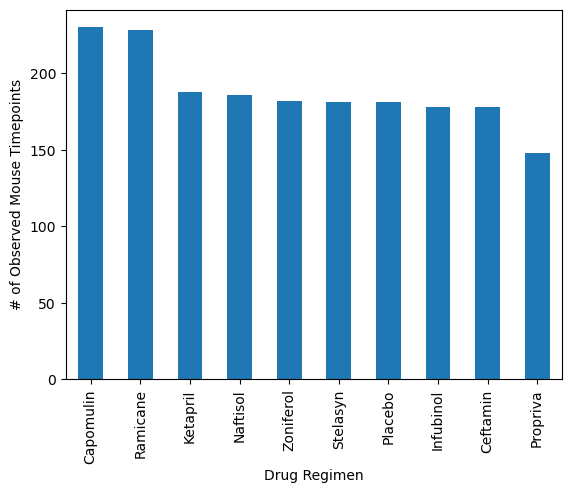

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_totals = mouse_clean["Drug Regimen"].value_counts()
drug_totals.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

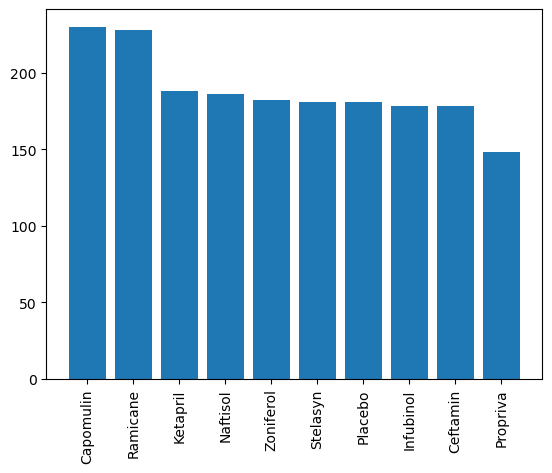

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drug_totals.index.values
y_axis = drug_totals.values
ticks = [drug for drug in x_axis]
plt.bar(x_axis, y_axis, align='center')
plt.xticks(ticks, rotation='vertical')
plt.show()

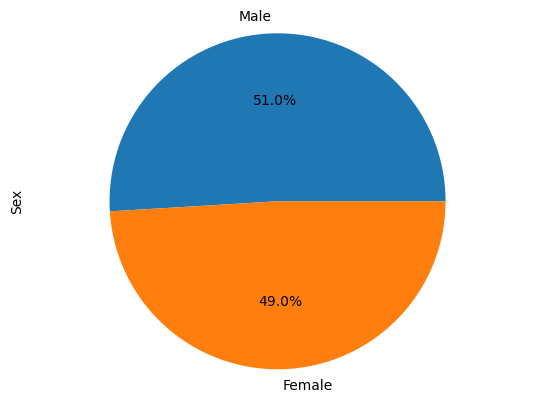

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = mouse_clean['Sex'].value_counts()
gender_data.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.show()

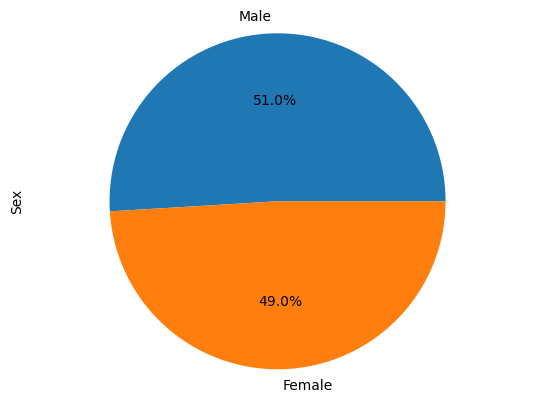

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexes = gender_data.index.values
sexes_split = gender_data.values
plt.pie(sexes_split, labels=sexes, autopct='%1.1f%%')
plt.axis('equal')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = mouse_clean.loc[mouse_clean['Drug Regimen'] == "Capomulin", :]
ramicane = mouse_clean.loc[mouse_clean['Drug Regimen'] == "Ramicane", :]
infubinol = mouse_clean.loc[mouse_clean['Drug Regimen'] == "Infubinol", :]
ceftamin = mouse_clean.loc[mouse_clean['Drug Regimen'] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
final_time = mouse_clean.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_time_df = pd.DataFrame(final_time)
merge_time = pd.merge(final_time_df, mouse_clean, on=('Mouse ID', 'Timepoint'), how='left')

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_mice = merge_time.loc[merge_time['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol.append(drug_mice)
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_mice.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = drug_mice.loc[(drug_mice < lower_bound) | (drug_mice > lower_bound)]
    
    print(f'{drug}s potential outliers: {outliers}')

Capomulins potential outliers: 19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64
Ramicanes potential outliers: 6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
76     33.562402
77     36.374510
91     31.560470
93     36.134852
96     22.050126
119    30.564625
126    31.095335
157    45.220869
158    36.561652
166    37.225650
168    43.419381
177    30.276232
190    40.667713
217    43.166373
235    44.183451
244    30.638696
Name: Tumor Volume (mm3), dtype: float64
Infubin

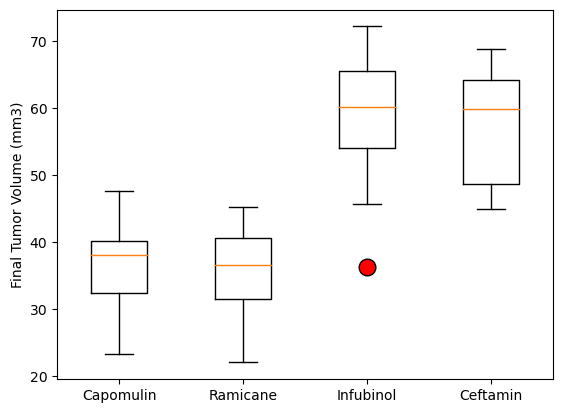

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='black')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol, labels=drugs, flierprops=flierprops)
plt.show()

## Line and Scatter Plots

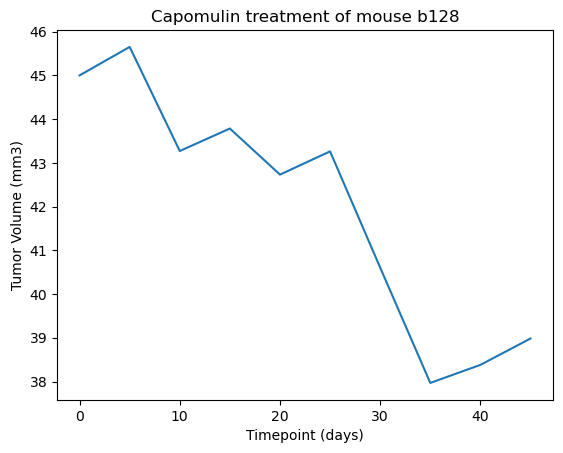

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = capomulin.loc[capomulin['Mouse ID'] == 'b128']
x_value = capomulin_mouse['Timepoint']
y_value = capomulin_mouse['Tumor Volume (mm3)']
plt.plot(x_value, y_value)
plt.title('Capomulin treatment of mouse b128')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

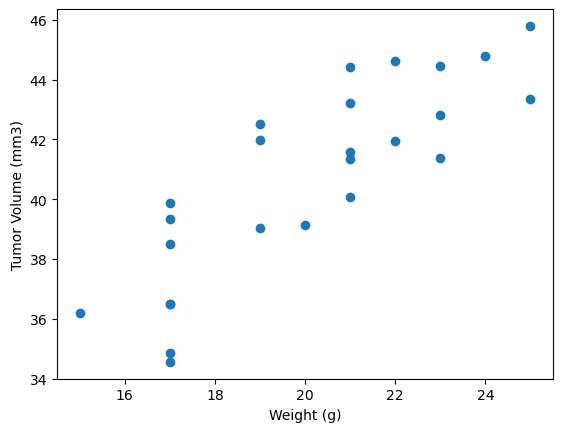

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avg = capomulin.groupby(['Mouse ID']).mean(numeric_only=True)
x_value2 = capomulin_avg['Weight (g)']
y_value2 = capomulin_avg['Tumor Volume (mm3)']
plt.scatter(x_value2, y_value2)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


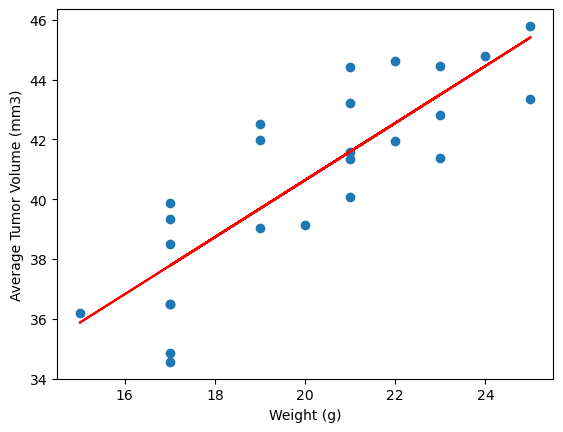

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(x_value2, y_value2)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value2, y_value2)
regress_values = x_value2 * slope + intercept
plt.scatter(x_value2, y_value2)
plt.plot(x_value2, regress_values, 'r-')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()